In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split ,GridSearchCV , RandomizedSearchCV


# 4.1 Data exploration (A)

In [2]:
df = pd.read_csv("./Resource/CarPrice.csv")
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [3]:
y = df['price']
y.shape

(205,)

In [4]:
df = df.drop(['car_ID','CarName','price'] , axis=1)

In [5]:
df.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22


> find null values

In [6]:
null_data = df[df.isnull().any(axis=1)]
null_data

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg


In [7]:
df.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000


# 4.1 Data Transform and Feature Selection  (b)

In [8]:
#get numeric features to list
numeric_feat = df.select_dtypes(include=np.number).columns.tolist()
numeric_feat

['symboling',
 'wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'enginesize',
 'boreratio',
 'stroke',
 'compressionratio',
 'horsepower',
 'peakrpm',
 'citympg',
 'highwaympg']

In [9]:
std = StandardScaler()

In [10]:
df[numeric_feat] = std.fit_transform(df[numeric_feat])

In [11]:
df.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
count,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02
mean,5.848980e-17,-1.496906e-15,3.730349e-15,9.964929e-16,-4.408398e-16,9.910771e-17,5.415722e-19,2.267021e-15,2.126483e-15,-3.115394e-16,1.914458e-16,6.553024e-17,1.104807e-16,1.743863e-16
std,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00
min,-2.281433e+00,-2.023713e+00,-2.677244e+00,-2.620512e+00,-2.430664e+00,-2.055348e+00,-1.586561e+00,-2.923049e+00,-3.789311e+00,-7.931011e-01,-1.422573e+00,-2.049347e+00,-1.872388e+00,-2.147310e+00
25%,-6.714717e-01,-7.085959e-01,-6.296552e-01,-8.447824e-01,-7.076263e-01,-7.904486e-01,-7.199469e-01,-6.653141e-01,-4.648342e-01,-3.892993e-01,-8.648707e-01,-6.832865e-01,-9.530117e-01,-8.371954e-01
50%,1.335090e-01,-2.924196e-01,-6.900603e-02,-1.905661e-01,1.538927e-01,-2.725519e-01,-1.662771e-01,-7.312136e-02,1.105560e-01,-2.883489e-01,-2.311186e-01,1.573661e-01,-1.868650e-01,-1.093538e-01
75%,9.384897e-01,6.065210e-01,7.354037e-01,4.636501e-01,7.282388e-01,7.305117e-01,3.392475e-01,9.262039e-01,4.941494e-01,-1.873985e-01,3.012332e-01,7.878555e-01,7.325109e-01,4.729195e-01
max,1.743470e+00,3.686225e+00,2.766741e+00,2.987056e+00,2.492302e+00,2.907988e+00,4.792679e+00,2.258638e+00,2.923575e+00,3.244916e+00,4.661448e+00,3.099650e+00,3.643868e+00,3.384286e+00


In [12]:
only_numeric = df[numeric_feat]
only_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    float64
 1   wheelbase         205 non-null    float64
 2   carlength         205 non-null    float64
 3   carwidth          205 non-null    float64
 4   carheight         205 non-null    float64
 5   curbweight        205 non-null    float64
 6   enginesize        205 non-null    float64
 7   boreratio         205 non-null    float64
 8   stroke            205 non-null    float64
 9   compressionratio  205 non-null    float64
 10  horsepower        205 non-null    float64
 11  peakrpm           205 non-null    float64
 12  citympg           205 non-null    float64
 13  highwaympg        205 non-null    float64
dtypes: float64(14)
memory usage: 22.5 KB


In [13]:
only_numeric_corr = only_numeric.corr()

<AxesSubplot:>

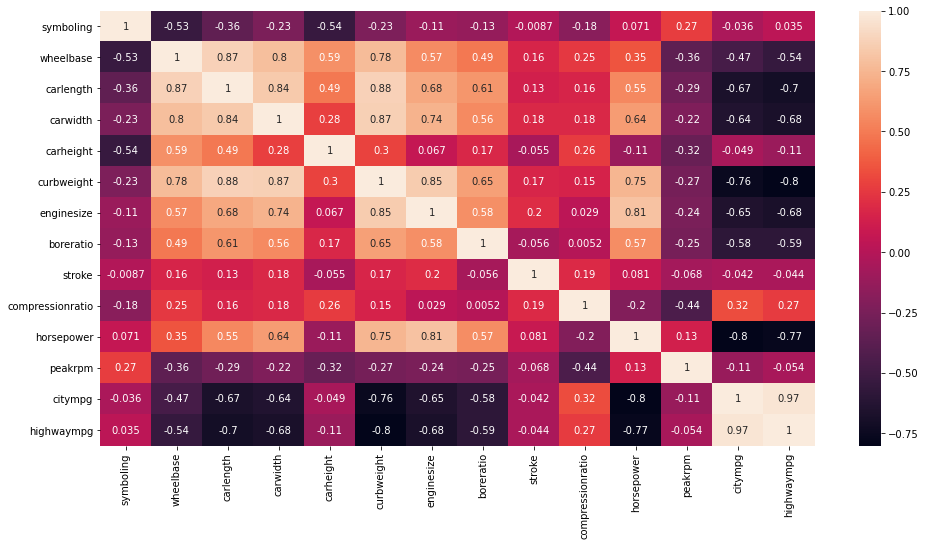

In [14]:
plt.figure(figsize=(16,8))
sns.heatmap(only_numeric_corr,annot=True )

sns.pairplot(penguins, hue="species")

In [15]:
lower_cor = pd.DataFrame(np.tril(only_numeric_corr, -1), columns = only_numeric_corr.columns)
lower_cor

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
1,-0.531954,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
2,-0.357612,0.874587,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
3,-0.232919,0.795144,0.841118,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
4,-0.541038,0.589435,0.491029,0.279210,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
5,-0.227691,0.776386,0.877728,0.867032,0.295572,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
6,-0.105790,0.569329,0.683360,0.735433,0.067149,0.850594,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
7,-0.130051,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
8,-0.008735,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
9,-0.178515,0.249786,0.158414,0.181129,0.261214,0.151362,0.028971,0.005197,0.186110,0.000000,0.000000,0.000000,0.000000,0.0


> #### Drop features that correlation > |0.86|

In [16]:
to_drop = [column for column in lower_cor if any(lower_cor[column] > abs(0.86) )]
to_drop

['wheelbase', 'carlength', 'carwidth', 'citympg']

In [17]:
df = df.drop(to_drop ,axis=1)

In [18]:
df

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,highwaympg
0,1.743470,gas,std,two,convertible,rwd,front,-2.020417,-0.014566,dohc,four,0.074449,mpfi,0.519071,-1.839377,-0.288349,0.174483,-0.262960,-0.546059
1,1.743470,gas,std,two,convertible,rwd,front,-2.020417,-0.014566,dohc,four,0.074449,mpfi,0.519071,-1.839377,-0.288349,0.174483,-0.262960,-0.546059
2,0.133509,gas,std,two,hatchback,rwd,front,-0.543527,0.514882,ohcv,six,0.604046,mpfi,-2.404880,0.685946,-0.288349,1.264536,-0.262960,-0.691627
3,0.938490,gas,std,four,sedan,fwd,front,0.235942,-0.420797,ohc,four,-0.431076,mpfi,-0.517266,0.462183,-0.035973,-0.053668,0.787855,-0.109354
4,0.938490,gas,std,four,sedan,4wd,front,0.235942,0.516807,ohc,five,0.218885,mpfi,-0.517266,0.462183,-0.540725,0.275883,0.787855,-1.273900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1.476452,gas,std,four,sedan,rwd,front,0.728239,0.763241,ohc,four,0.339248,mpfi,1.666445,-0.336970,-0.162161,0.250533,0.577692,-0.400490
201,-1.476452,gas,turbo,four,sedan,rwd,front,0.728239,0.949992,ohc,four,0.339248,mpfi,1.666445,-0.336970,-0.364062,1.416637,0.367529,-0.837195
202,-1.476452,gas,std,four,sedan,rwd,front,0.728239,0.878757,ohcv,six,1.109571,mpfi,0.926204,-1.232021,-0.338824,0.757535,0.787855,-1.128332
203,-1.476452,diesel,turbo,four,sedan,rwd,front,0.728239,1.273437,ohc,six,0.435538,idi,-1.183483,0.462183,3.244916,0.047732,-0.683286,-0.546059


> #### Create Dummy with Qualitative variable

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    float64
 1   fueltype          205 non-null    object 
 2   aspiration        205 non-null    object 
 3   doornumber        205 non-null    object 
 4   carbody           205 non-null    object 
 5   drivewheel        205 non-null    object 
 6   enginelocation    205 non-null    object 
 7   carheight         205 non-null    float64
 8   curbweight        205 non-null    float64
 9   enginetype        205 non-null    object 
 10  cylindernumber    205 non-null    object 
 11  enginesize        205 non-null    float64
 12  fuelsystem        205 non-null    object 
 13  boreratio         205 non-null    float64
 14  stroke            205 non-null    float64
 15  compressionratio  205 non-null    float64
 16  horsepower        205 non-null    float64
 1

In [20]:
# get non-numerric features
non_numeric_feat = df.select_dtypes(include=object).columns.tolist()
non_numeric_feat

['fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'enginetype',
 'cylindernumber',
 'fuelsystem']

In [21]:
df_with_dummy = pd.get_dummies(df, columns = non_numeric_feat, drop_first=True)

In [30]:
df_with_dummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   symboling              205 non-null    float64
 1   carheight              205 non-null    float64
 2   curbweight             205 non-null    float64
 3   enginesize             205 non-null    float64
 4   boreratio              205 non-null    float64
 5   stroke                 205 non-null    float64
 6   compressionratio       205 non-null    float64
 7   horsepower             205 non-null    float64
 8   peakrpm                205 non-null    float64
 9   highwaympg             205 non-null    float64
 10  fueltype_gas           205 non-null    uint8  
 11  aspiration_turbo       205 non-null    uint8  
 12  doornumber_two         205 non-null    uint8  
 13  carbody_hardtop        205 non-null    uint8  
 14  carbody_hatchback      205 non-null    uint8  
 15  carbod

 # 4.2 PCA Dimensional Reduction

> #### All features PCA

In [31]:
#context function
def _plot(value ,title):
    x_label = []
    for i in range( len(value)):
        label = "PCA:" +str(i)
        x_label.append(label)
    plt.figure(figsize=(16,4))
    plt.title(title)
    sns.set_theme(style="whitegrid")
    ax = sns.barplot(x=x_label, y=value )
    plt.show()

In [32]:
pca = PCA()
all_feat_pca = pca.fit_transform(df_with_dummy)

In [33]:
all_feat_pca

array([[ 4.16168852e-01, -2.15172620e+00,  1.40355481e-01, ...,
         3.70020310e-02,  3.69887724e-16, -2.81979322e-16],
       [ 4.16168852e-01, -2.15172620e+00,  1.40355481e-01, ...,
         3.70020310e-02, -1.39461258e-17, -1.83822128e-16],
       [ 9.21321155e-01, -1.23063503e+00, -1.07798624e+00, ...,
         3.78511279e-02, -1.48147788e-16,  2.59852583e-16],
       ...,
       [ 2.64425906e+00,  9.17590530e-02,  1.93007000e+00, ...,
         5.13940138e-02,  3.43674045e-17,  6.86800032e-18],
       [ 1.25047129e+00,  3.11882649e+00, -1.59296171e+00, ...,
        -3.65322988e-02,  7.83936827e-17, -1.63762159e-16],
       [ 2.08074373e+00,  7.41922820e-01,  1.37437356e+00, ...,
         3.53672333e-02,  3.11843000e-17, -3.85137459e-17]])

> Explained Variance ratio 

In [34]:
variance_percent = pca.explained_variance_ratio_ * 100
#print('Explained Variance ratio = ', variance_percent)

> eigen values

In [35]:
variance = pca.explained_variance_
#variance

> eigen vectors

In [36]:
#pca.components_[0:2,:]

In [44]:
#_plot(variance_percent , "variance ratio")

## 4.2 PCA Dimensional Reduction (4 Components)

In [403]:
pca4 = PCA(n_components=4)
PCA4 = n_pca.fit_transform(df_with_dummy)
PCA4C = pd.DataFrame(data=PCA4)

> Eigen values

In [72]:
interested_variance_r = n_pca.explained_variance_ratio_ * 100
#interested_variance_r

In [73]:
#_plot(interested_variance_r , "4 Component variance_ratio")

In [400]:
y

0      13495.0
1      16500.0
2      16500.0
3      13950.0
4      17450.0
        ...   
200    16845.0
201    19045.0
202    21485.0
203    22470.0
204    22625.0
Name: price, Length: 205, dtype: float64

# Prepare  data for train models

In [235]:
pca2 = PCA(n_components=2)
PCA2 = pca2.fit_transform(df_with_dummy)

In [236]:
pca3 = PCA(n_components=6)
PCA3 =  pca3.fit_transform(df_with_dummy)

# 4.3 Linear Regression

In [345]:
def _lrplot(x ,y, y_prediction ,name_of_set):
    plt.figure(figsize=(12,12))
    plt.plot(x , y_prediction ,color='b' ,label="Linear Regression" ,linewidth=2.5)
    plt.scatter(x , y ,color='r' , alpha=1 , label=name_of_set ,s=50)
    plt.legend()

In [346]:
validate_r2 = []
test_r2 = []
validate_mse = []
test_mse  = []

In [347]:
NO_PCA = df_with_dummy
#PCA1 = test_df["PCA1"].values.reshape(-1,1)
#PCA2 = test_df["PCA2"].values.reshape(-1,1)
#PCA3 = test_df["PCA3"].values.reshape(-1,1)
#PCA4 = test_df["PCA4"].values.reshape(-1,1)


In [348]:
# Shuffle Split (Train / Test Split)
Rseed = 40
NO_PCA_train, NO_PCA_test, y_train_set, y_test = train_test_split(NO_PCA, y, test_size = 0.3, random_state = Rseed)
PCA2_train, PCA2_test, y_train_set, y_test = train_test_split(PCA2, y, test_size = 0.3, random_state = Rseed)
PCA3_train, PCA3_test, y_train_set, y_test = train_test_split(PCA3, y, test_size = 0.3, random_state = Rseed)
PCA4_train, PCA4_test, y_train_set, y_test = train_test_split(PCA4, y, test_size = 0.3, random_state = Rseed)

In [349]:
#Shuffle Split (Train / Validation Split)
NO_PCA_train, NO_PCA_validate, y_train, y_validate = train_test_split(NO_PCA_train, y_train_set, test_size = 0.3, random_state = Rseed)
#PCA1_train, PCA1_validate,y_train, y_validate = train_test_split(PCA1_train, y_train_set, test_size = 0.3, random_state = Rseed)
PCA2_train, PCA2_validate, y_train, y_validate = train_test_split(PCA2_train, y_train_set, test_size = 0.3, random_state = Rseed)
PCA3_train, PCA3_validate,y_train, y_validate = train_test_split(PCA3_train, y_train_set, test_size = 0.3, random_state = Rseed)
PCA4_train, PCA4_validate,y_train, y_validate = train_test_split(PCA4_train, y_train_set, test_size = 0.3, random_state = Rseed)

> ##  NO PCA

In [350]:
# Perform Linear Regression -> All variables
lr= LinearRegression()
# Train
nopca_model = lr.fit(NO_PCA_train, y_train )
# Validate
nopca_prediction = nopca_model.predict(NO_PCA_validate)
# Test
nopcatest_prediction = nopca_model.predict(NO_PCA_test)

In [351]:
#Measure Accuracy Validation and Test
r2score_nopca = r2_score(y_validate, nopca_prediction)
r2score_nopca_t = r2_score(y_test ,nopcatest_prediction)
mse_nopca_v = nopca_model.score(NO_PCA_validate, y_validate)
mse_nopca_t  = nopca_model.score(NO_PCA_test, y_test)
NO_PCA_validate.values.reshape(-1,1).shape

(1677, 1)

In [352]:
validate_r2.append(r2score_nopca)
test_r2.append(r2score_nopca_t)
validate_mse.append(mse_nopca_v)
test_mse.append(mse_nopca_t)

> ## 2 COMPONENTS PCA

In [441]:
# Perform Linear Regression -> All variables
lr = LinearRegression()
# Train
pca2_model = lr.fit(PCA2_train, y_train )
# Validate
pca2_prediction = pca2_model.predict(PCA2_validate)
# Test
pca2test_prediction = pca2_model.predict(PCA2_test)

In [442]:
pca2_model.coef_

array([3326.96085902, -166.49114966])

In [354]:
r2score_pca2 = r2_score( y_validate, pca2_prediction)
r2score_pca2_t = r2_score(y_test ,pca2test_prediction)
mse_pca2_v = pca2_model.score(PCA2_validate, y_validate)
mse_pca2_t  = pca2_model.score(PCA2_test, y_test)

In [462]:
mse_pca2_t

0.7218911566494177

In [356]:
validate_r2.append(r2score_pca2)
test_r2.append(r2score_pca2_t)
validate_mse.append(mse_pca2_v)
test_mse.append(mse_pca2_t)

> # 6 Components PCA

In [359]:
# Train
pca3_model = lr.fit(PCA3_train, y_train )
# Validate
pca3_prediction = pca3_model.predict(PCA3_validate)
# Test
pca3test_prediction = pca3_model.predict(PCA3_test)

In [360]:
r2score_pca3 = r2_score(y_validate ,pca3_prediction )
r2score_pca3_t = r2_score(y_test ,pca3test_prediction )
mse_pca3_v = pca3_model.score(PCA3_validate, y_validate)
mse_pca3_v  = pca3_model.score(PCA3_test, y_test)

In [361]:
validate_r2.append(r2score_pca3)
test_r2.append(r2score_pca3_t)
validate_mse.append(mse_pca3_v)
test_mse.append(mse_pca3_v)

> # 4 Components PCA

In [362]:
# Train model
pca4_model = lr.fit(PCA4_train, y_train )
# Validate
pca4_prediction = pca4_model.predict(PCA4_validate)
# Test
pca4test_prediction = pca4_model.predict(PCA4_test)

In [363]:
r2score_pca4 = r2_score(y_validate ,pca4_prediction )
r2score_pca4_t = r2_score(y_test ,pca4test_prediction )
mse_pca4_v = pca4_model.score(PCA4_validate, y_validate)
mse_pca4_t  = pca4_model.score(PCA4_test, y_test)

In [364]:
validate_r2.append(r2score_pca4)
test_r2.append(r2score_pca4_t)
validate_mse.append(mse_pca4_v)
test_mse.append(mse_pca4_t)

# COMPARE SCORES BETWEEN VALIDATION & TEST 

In [466]:
r2_scores = np.around(validate_r2 ,decimals=4)
r2_Tscores = np.around(test_r2,decimals=4)
mse_scores = np.around(validate_mse,decimals=4)
mse_Tscores = np.around(test_mse,decimals=4)

In [468]:
mse_Tscores

array([0.847 , 0.7219, 0.8231, 0.7605])

In [469]:
ypos = np.array(["NOPCA","PCA2COM",'PCA6COMP','PCA4COMP'])
ypos

array(['NOPCA', 'PCA2COM', 'PCA6COMP', 'PCA4COMP'], dtype='<U8')

In [526]:
def compare_acc (validate_set , test_set) : 
   
    plt.figure(figsize=(8,8))
    plt.bar(ypos , validate_set ,label="validate set" ,align="center"  )
    plt.plot(test_set ,color='r' , label="test set" , linewidth=2.5 )
    plt.legend()
    
    for i in range(len(validate_set)):
        plt.text(i , validate_set[i] ,validate_set[i] ,ha="center")

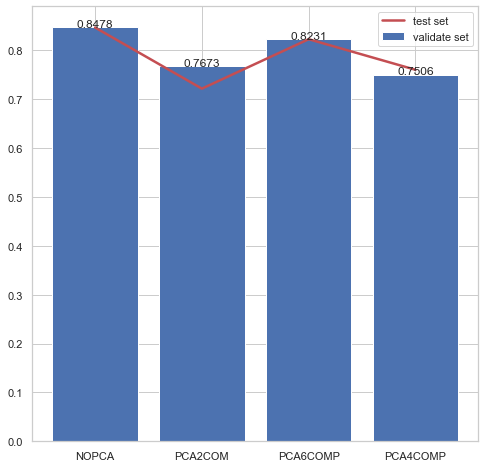

In [527]:
compare_acc(mse_scores , mse_Tscores)

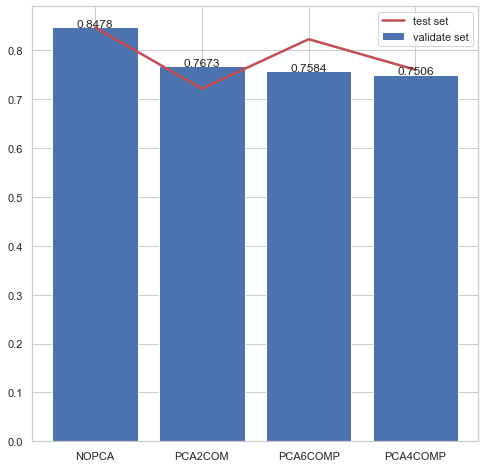

In [528]:
compare_acc(r2_scores , r2_Tscores)

> # Stats models

In [529]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [530]:
def _createDf(PCA):
    df = pd.DataFrame(data=PCA)
    concated = pd.concat([df , y] ,join = 'outer', axis = 1)
    return df

In [531]:
pca2_comp = _createDf(PCA2)
pca4_comp = _createDf(PCA4)
pca6_comp = _createDf(PCA3)

> 2 component

In [534]:
model_4comp = sm.OLS(pca4_comp ,y )
res = model_4comp.fit()

In [1]:
print(res.summary())

NameError: name 'res' is not defined

In [536]:
pca4_model.intercept_

13416.908956403204